# Classification Algorithm application on Labeled Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eng_train = pd.read_csv('E:\Preet\Internship Raj Vijtech\Aircraft data & analysis\CSV data files\Train_data_csv.csv')

In [9]:
survive = eng_train[eng_train['Label']==0]
fail1 = eng_train[eng_train['Label']==1]
fail2 = eng_train[eng_train['Label']==2]

<AxesSubplot:xlabel='Time in Cycles', ylabel='S4'>

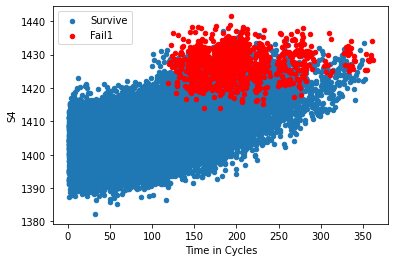

In [13]:
axes = survive.plot(kind = 'scatter', x='Time in Cycles',y='S4',label = 'Survive')
fail1.plot(kind = 'scatter', x='Time in Cycles',y='S4', color='red', ax=axes,label = 'Fail1')


In [11]:
#Drop Unit No.
eng_train1 = eng_train.drop(['Unit No.'], axis = 1)

features = eng_train[eng_train1.columns]

# Define X & y for the train_test_split
X = np.asarray(features)
y = np.asarray(eng_train['Label'])


## Support Vector Machine(SVM)

In [5]:
from sklearn.model_selection import train_test_split

In [50]:
#Split the data into train & test with 20% test size, use random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn import svm

In [33]:
classifier = svm.SVC(gamma = 'auto', C=1)       #Define the 

In [ ]:
from sklearn import svm

In [39]:
#Fit the model on Training data
classifier.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [40]:
#Predict the labels for Testing data
y_predict = classifier.predict(X_test)

In [7]:
# Import Classification report & confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3905
           1       0.85      0.13      0.22       222

    accuracy                           0.95      4127
   macro avg       0.90      0.56      0.60      4127
weighted avg       0.95      0.95      0.93      4127

[[3900    5]
 [ 194   28]]


C:\Users\PREET\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


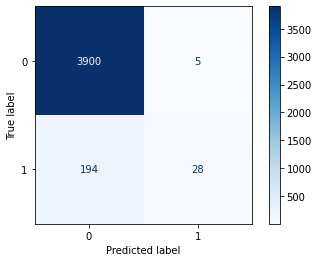

In [41]:
print(classification_report(y_test,y_predict))                    #Print classification report
print(confusion_matrix(y_test, y_predict))
plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues) #Plot confusion matrix

## K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
error_rate=[]

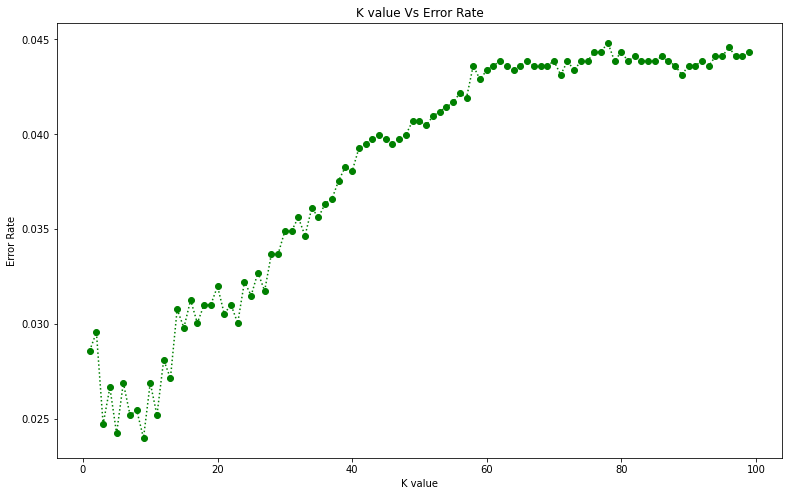

In [9]:
# Use following code to determine optimum K value for our data
for i in range(1,100):
            knn = KNeighborsClassifier(n_neighbors=i)
            model = knn.fit(X_train,y_train)
            pred_i = knn.predict(X_test)
            error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(13,8))
plt.plot(range(1,100), error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('K value Vs Error Rate')
plt.show()

In [157]:
#Train the model using optimum K value, n_neighbors = 11 in our case
K_nn = KNeighborsClassifier(n_neighbors = 11).fit(X_train,y_train) 

In [158]:
y_pred_knn = K_nn.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3905
           1       0.84      0.65      0.74       222

    accuracy                           0.97      4127
   macro avg       0.91      0.82      0.86      4127
weighted avg       0.97      0.97      0.97      4127

[[3878   27]
 [  77  145]]


C:\Users\PREET\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


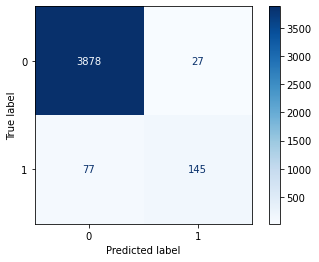

In [159]:
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
plot_confusion_matrix(K_nn,X_test,y_test,cmap=plt.cm.Blues)

In [97]:
#Accuracy of the model 
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy: 0.9512963411679186


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
R_forest = RandomForestClassifier().fit(X_train,y_train)

In [166]:
y_forest = R_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3905
           1       0.86      0.80      0.83       222

    accuracy                           0.98      4127
   macro avg       0.92      0.89      0.91      4127
weighted avg       0.98      0.98      0.98      4127

[[3876   29]
 [  45  177]]


C:\Users\PREET\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


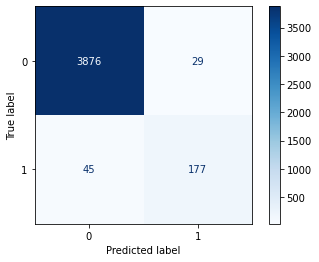

In [167]:
print(classification_report(y_test,y_forest))
print(confusion_matrix(y_test, y_forest))
plot_confusion_matrix(R_forest,X_test,y_test,cmap=plt.cm.Blues)

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_forest))

Accuracy: 0.9791616186091592


## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [16]:
Log_reg = LogisticRegression( max_iter = 1000).fit(X_train,y_train)

In [17]:
y_logreg = Log_reg.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3927
           1       0.80      0.78      0.79       200

    accuracy                           0.98      4127
   macro avg       0.90      0.88      0.89      4127
weighted avg       0.98      0.98      0.98      4127

[[3889   38]
 [  45  155]]


C:\Users\PREET\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


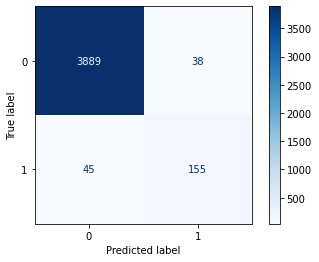

In [18]:
print(classification_report(y_test,y_logreg))
print(confusion_matrix(y_test, y_logreg))
plot_confusion_matrix(Log_reg,X_test,y_test,cmap=plt.cm.Blues)

## Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB

In [137]:
Nb = GaussianNB().fit(X_train,y_train)

In [138]:
y_nb = Nb.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.91      0.96      3903
           1       0.40      0.99      0.57       224

    accuracy                           0.92      4127
   macro avg       0.70      0.95      0.76      4127
weighted avg       0.97      0.92      0.93      4127

[[3571  332]
 [   2  222]]


C:\Users\PREET\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


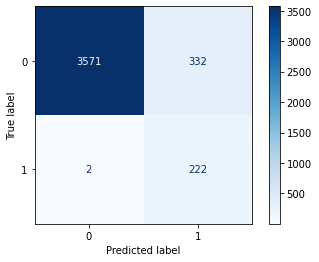

In [139]:
print(classification_report(y_test,y_nb))
print(confusion_matrix(y_test, y_nb))
plot_confusion_matrix(Nb,X_test,y_test,cmap=plt.cm.Blues)

# Gradient Boost

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
Boosted_forest = GradientBoostingClassifier().fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3903
           1       0.85      0.79      0.81       224

    accuracy                           0.98      4127
   macro avg       0.92      0.89      0.90      4127
weighted avg       0.98      0.98      0.98      4127

[[3871   32]
 [  48  176]]


C:\Users\PREET\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


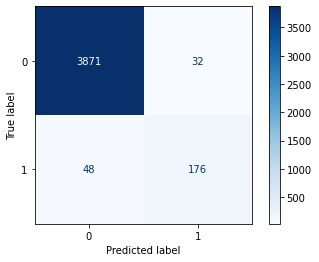

In [141]:
y_bforest = Boosted_forest.predict(X_test)
print(classification_report(y_test,y_bforest))
print(confusion_matrix(y_test, y_bforest))
plot_confusion_matrix(Boosted_forest,X_test,y_test,cmap=plt.cm.Blues)

## XG Boost

[09:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3940
           1       0.79      0.81      0.80       187

    accuracy                           0.98      4127
   macro avg       0.89      0.90      0.90      4127
weighted avg       0.98      0.98      0.98      4127

[[3899   41]
 [  35  152]]


C:\Users\PREET\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


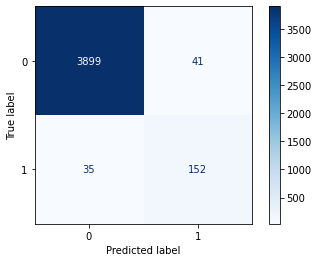

In [142]:
from xgboost import XGBClassifier

xgb= XGBClassifier(use_label_encoder=False).fit(X_train,y_train)
y_xgb = xgb.predict(X_test)
print(classification_report(y_test,y_xgb))
print(confusion_matrix(y_test, y_xgb))
plot_confusion_matrix(xgb,X_test,y_test,cmap=plt.cm.Blues)